In [40]:
import numpy as np
import pandas as pd
import Easy_Risk_Kit as erk 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#it s not always easy to find zero coupon bonds that are matched to my liability 
#the good thing about coupon bond is that i know that dollar would be there regardless of interest rate 

In [41]:
erk.bond_cash_flows(3, 100, 0.03,2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [46]:
erk.bond_price(20, 1000, 0.05, 2, 0.04)

1136.7773962036904

In [14]:
#paying a coupon of 5% that is higher than the interest rate of today is 4 %, so the price of this bound is at premiuim 

In [47]:
erk.bond_price(20, 1000, 0.05, 2, 0.05)

1000.0000000000023

In [17]:
# the face value of the bond
#as interest rate falls, bond price rise

In [48]:
rates=np.linspace(0.01, 0.10, num=20)
rates

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [49]:
prices= [erk.bond_price(10, 1000, 0.05, 2, rate) for rate in rates]
prices

[1379.7483829333992,
 1326.7629283179222,
 1276.1632981372743,
 1227.833537616068,
 1181.6636507727876,
 1137.5492793724407,
 1095.3913999300185,
 1055.0960377089511,
 1016.5739967228162,
 979.7406048086303,
 944.5154728963505,
 910.8222676519945,
 878.5884967212596,
 847.74530584692,
 818.2272871767957,
 789.9722981198867,
 762.9212901465673,
 737.0181469646424,
 712.209531536784,
 688.4447414365]

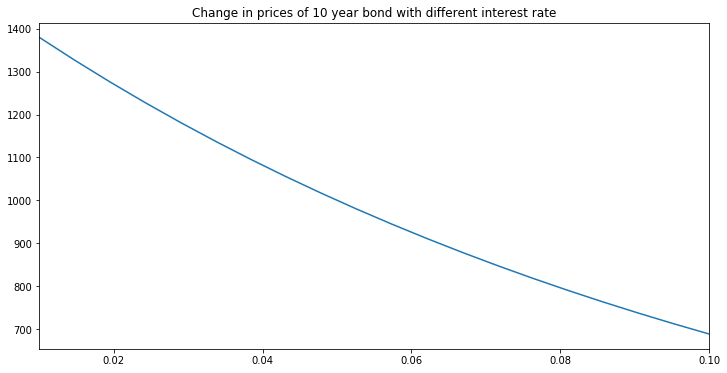

In [50]:
pd.DataFrame(data=prices, index=rates).plot(title= "Change in prices of 10 year bond with different interest rate", legend = False, figsize=(12,6
                                                                                                                                            
                                                                                                                                        ))

In [24]:
# as interest rate rise, the price of the bound falls

In [51]:
cf=erk.bond_cash_flows(3, 1000, 0.06,2)

In [52]:
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [53]:
discounts= erk.discount(cf.index, 0.06/2 )
discounts

Float64Index([ 0.970873786407767, 0.9425959091337544, 0.9151416593531595,
              0.8884870479156888, 0.8626087843841639, 0.8374842566836542],
             dtype='float64')

In [29]:
# These ar ethe discount factors of each payments

In [54]:
dcf=discounts*cf

In [55]:
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

In [32]:
#pv of each of the cash flow generated by the bond

In [56]:
weights= dcf/dcf.sum()
weights

1    0.029126
2    0.028278
3    0.027454
4    0.026655
5    0.025878
6    0.862609
dtype: float64

In [57]:
(cf.index*weights).sum() #This is the weighted avg of all the periods= The Macaulay duration

5.579707187194534

In [35]:
#if the interest rate move and you have a large duration then the price is going to move a lot 
#but if you have a short duration then the price will not move as much 
# for a zero coupon bond, the duration is the Macaulay.

In [58]:
erk.maucaulay_duration(erk.bond_cash_flows(3, 1000, .06, 2), .06/2)

5.579707187194534

##DURATION MATCHING- build a portfolio that has the same duration as my liabilities

In [59]:
liabilities=pd.Series(data=[100000,100000], index= [10,12])
erk.maucaulay_duration(liabilities, .04)


10.960799385088393

In [60]:
md_10=erk.maucaulay_duration(erk.bond_cash_flows(10, 1000, 0.05, 1), .04)
md_20=erk.maucaulay_duration(erk.bond_cash_flows(20, 1000, 0.05, 1), .04)



In [61]:
md_10, md_20

(8.190898824083233, 13.544718122145921)

In [62]:
short_bond=erk.bond_cash_flows(10, 1000, 0.05, 1)
long_bond=erk.bond_cash_flows(20, 1000, 0.05, 1)
w_s=erk.match_durations(liabilities, short_bond, long_bond, .04)
w_s

0.48263092069478974

In [44]:
#you have to pur 40% of your asset sin the short bond and teh rest in the long bond

In [63]:
p_short=erk.bond_price(10, 1000, .05, 1, .04)
p_long=erk.bond_price(20, 1000, .05, 1, .04)
a_0=130000
p_flows=pd.concat([a_0*w_s*short_bond/p_short, a_0*(1-w_s)*long_bond/p_long ])
erk.maucaulay_duration(p_flows, 0.04)

10.960799385088393

In [47]:
#10.96 is the duration of this particular portfolio 

In [64]:
cfr = erk.funding_ratio(p_flows, liabilities, .04)

In [65]:
cfr

0.9998760012192478

I am pretty much funded

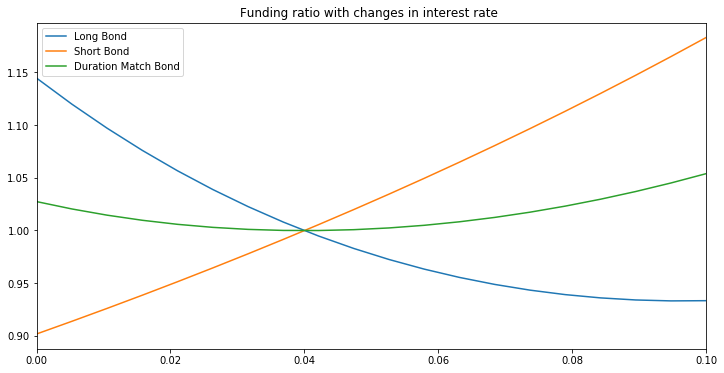

In [68]:
rates=np.linspace(0, .1, 20)
lb_assets=a_0*long_bond/p_long
sb_assets= a_0*short_bond/p_short

fr_changes = pd.DataFrame({
    "Long Bond": [erk.funding_ratio(lb_assets, liabilities,r) for r in rates],
    "Short Bond":[erk.funding_ratio(sb_assets, liabilities,r) for r in rates],
    "Duration Match Bond": [erk.funding_ratio(p_flows, liabilities,r) for r in rates]
} ,index=rates)
                           

fr_changes.plot(title="Funding ratio with changes in interest rate ", figsize=(12,6))

In [58]:
#y funding ratio and x is interest 

when you don't have access to zero coupon, you construct a portfolio where you have regular bonds but try to make
sure that the liabilities has a duratin that is matched with my asset. 
If duration of liabilities and asset are not the same then I have exposure to interest rate risk